In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
import numpy as np


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

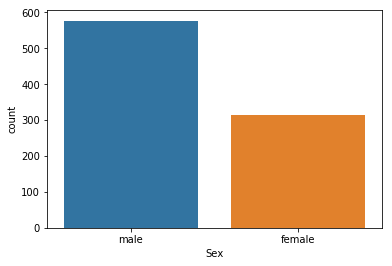

In [7]:
#Gender
sns.countplot('Sex',data=train)

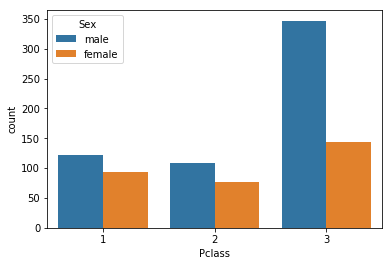

In [8]:
sns.countplot('Pclass',data=train,hue='Sex')

In [9]:
# women and child will be given preference

def gender(passenger):
    age,sex=passenger
    if age<16:
        return 'child'
    else:
        return sex

In [10]:
train['Person']=train[['Age','Sex']].apply(gender,axis=1)

In [11]:
train[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


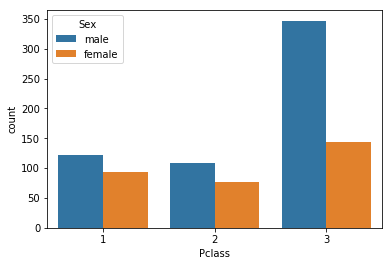

In [12]:
sns.countplot('Pclass',data=train,hue='Sex')

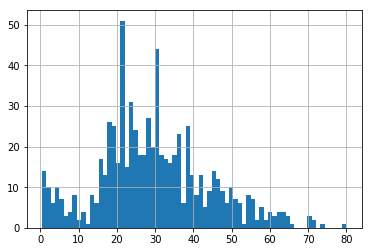

In [13]:
train['Age'].hist(bins=70)

In [14]:
train['Age'].mean()

29.69911764705882

In [15]:
train['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

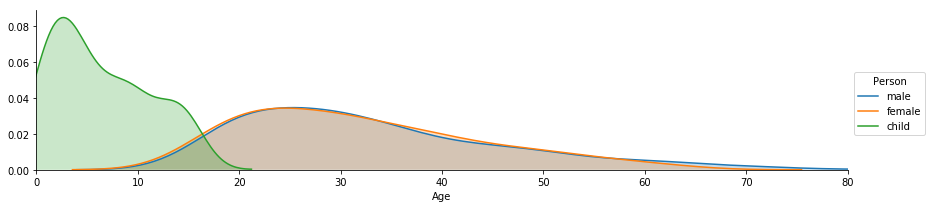

In [16]:
fig=sns.FacetGrid(train,hue='Person',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)
oldest=train['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [18]:
deck=train['Cabin'].dropna()

In [19]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

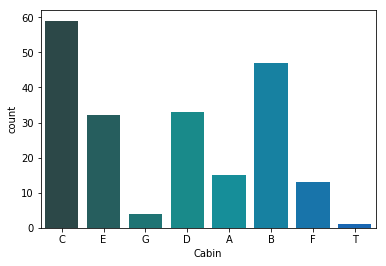

In [20]:
levels=[]

for level in deck:
    levels.append(level[0])
    
cabin_df=DataFrame(levels)
cabin_df.columns=['Cabin']
sns.countplot('Cabin',data=cabin_df,palette='winter_d')


In [21]:
cabin_df=cabin_df[cabin_df.Cabin!='T']

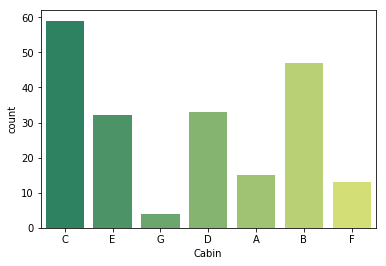

In [22]:

sns.countplot('Cabin',data=cabin_df,palette='summer')


In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


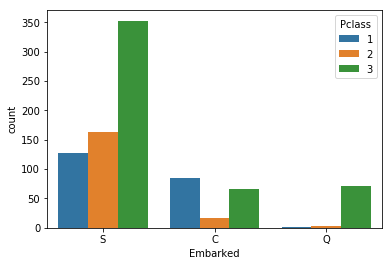

In [24]:
sns.countplot('Embarked',data=train,hue='Pclass')

In [25]:
train['Alone']=train.SibSp+train.Parch

In [26]:
train['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [27]:
train['Alone'].loc[train['Alone']>0]='With Family'
train['Alone'].loc[train['Alone']==0]='Alone'

C:\Users\Garry\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


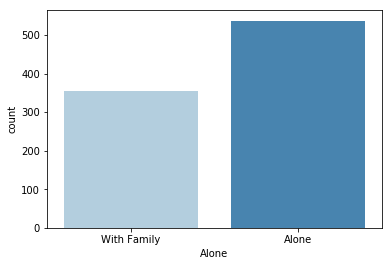

In [29]:
sns.countplot('Alone',data=train,palette='Blues')

In [30]:
train['Survivor']=train.Survived.map({0:'no',1:'yes'})

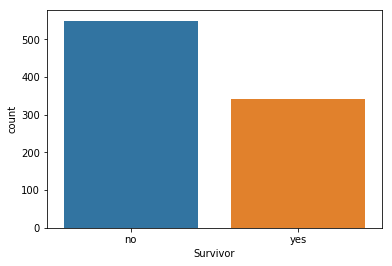

In [31]:
sns.countplot('Survivor',data=train)

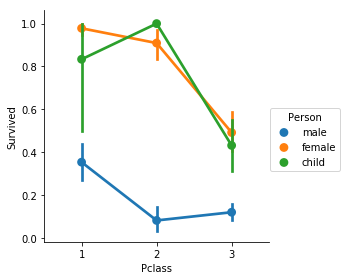

In [32]:
sns.factorplot('Pclass','Survived',hue='Person',data=train)

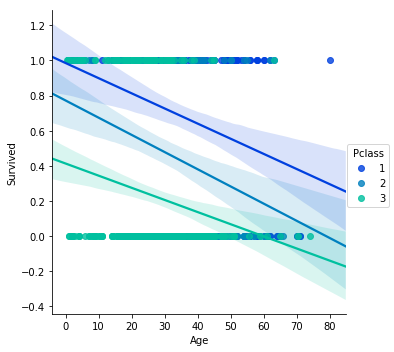

In [33]:
sns.lmplot('Age','Survived',hue='Pclass',data=train,palette='winter')

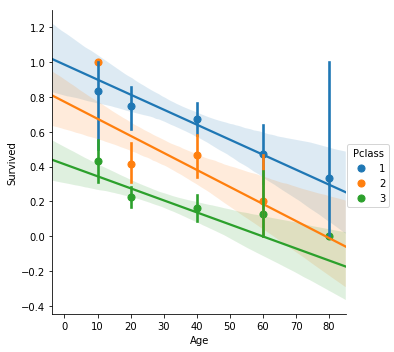

In [34]:
generations=[10,20,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass',data=train,x_bins=generations)

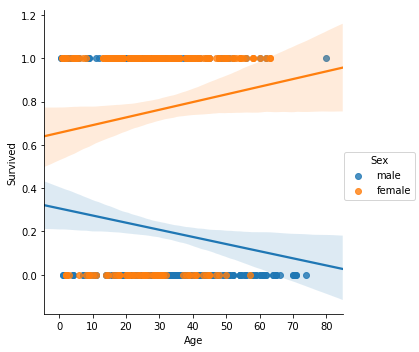

In [35]:
sns.lmplot('Age','Survived',hue='Sex',data=train)

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


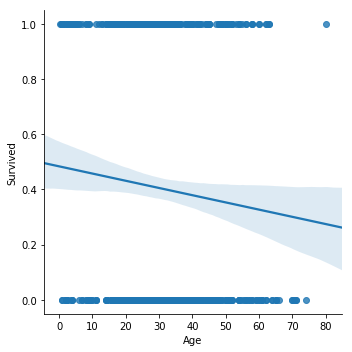

In [37]:
sns.lmplot('Age','Survived',data=train)

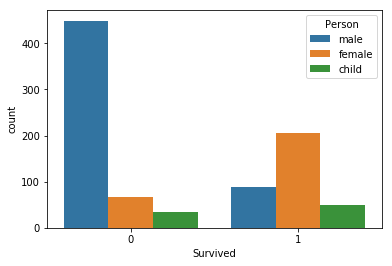

In [38]:
sns.countplot('Survived',data=train,hue='Person')

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


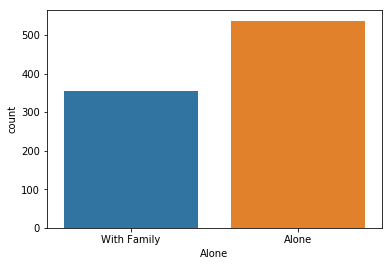

In [40]:
sns.countplot('Alone',data=train)

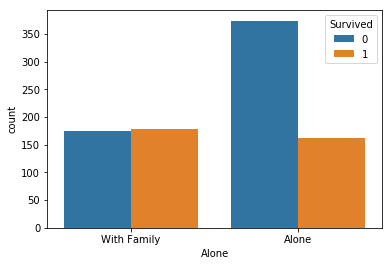

In [41]:
sns.countplot('Alone',hue='Survived',data=train)

In [42]:
#Feature Engineering

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Person         891 non-null object
Alone          891 non-null object
Survivor       891 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 104.5+ KB


In [45]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Person           0
Alone            0
Survivor         0
dtype: int64

In [46]:
# We can see Age and Cabin value is missing in many rows

In [47]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [48]:
test=pd.read_csv('Test.csv')

In [49]:
test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [50]:
dataset=[train,test]

In [51]:
#AGE

map_sex={"male":0,"female":1}
for i in dataset:
    i['Sex']=i['Sex'].map(map_sex)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [53]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
#NAME

def title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return unknown




In [55]:
train['Title']=train['Name'].apply(title)
test['Title']=test['Name'].apply(title)

In [56]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,Mr


In [57]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [58]:
train['Title'].value_counts()


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Sir               1
Mme               1
the Countess      1
Don               1
Jonkheer          1
Lady              1
Capt              1
Name: Title, dtype: int64

In [59]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [60]:
'''Title map
Mr : 0
Miss : 1
Mrs: 2
Others: 3'''

'Title map\nMr : 0\nMiss : 1\nMrs: 2\nOthers: 3'

In [61]:
map_title={ "Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3}

In [62]:
for i in dataset:
    i['Title']=i['Title'].map(map_title)

In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,0.0


In [64]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,2


In [65]:
#We have converted names in titles(numerical values)

In [66]:
train.drop('Name',axis=1)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,0.0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,no,0.0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,male,Alone,no,0.0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,child,With Family,no,3.0
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,female,With Family,yes,2.0
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,child,With Family,yes,2.0


In [67]:
train.drop('Survivor',axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,female,With Family,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,male,Alone,0.0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,male,Alone,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,child,With Family,3.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,female,With Family,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,child,With Family,2.0


In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,0.0


In [69]:
train.drop('Survivor',axis=1,inplace=True)

In [70]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,female,With Family,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,male,Alone,0.0


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Person         891 non-null object
Alone          891 non-null object
Title          890 non-null float64
dtypes: float64(3), int64(6), object(6)
memory usage: 104.5+ KB


In [72]:
train.drop('Person',axis=1,inplace=True)

In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,With Family,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,With Family,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,With Family,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Alone,0.0


In [74]:
# Drop cabin as there are lot of null values


In [75]:
test.drop('Cabin',axis=1,inplace=True)

In [76]:
train.drop('Cabin',axis=1,inplace=True)

In [77]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,With Family,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,With Family,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Alone,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,With Family,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Alone,0.0


In [78]:
train.drop('PassengerId',axis=1,inplace=True)

In [79]:
test.drop('PassengerId',axis=1,inplace=True)

In [80]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,With Family,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,With Family,2.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Alone,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,With Family,2.0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Alone,0.0


In [81]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S,2
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q,0
3,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S,2


In [82]:
test['Alone']=test['SibSp']+test['Parch']

In [83]:
train['Alone']=train['SibSp']+train['Parch']

In [84]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,1,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,2.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,1,2.0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,0.0


In [85]:
test.drop('SibSp',axis=1,inplace=True)
train.drop('SibSp',axis=1,inplace=True)

In [86]:
test.drop('Parch',axis=1,inplace=True)
train.drop('Parch',axis=1,inplace=True)

In [87]:
train.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Alone,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,S,1,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C,1,2.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,S,0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,S,1,2.0
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,S,0,0.0


In [88]:
train.drop('Name',axis=1,inplace=True)

In [89]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Alone,Title
0,0,3,0,22.0,A/5 21171,7.2500,S,1,0.0
1,1,1,1,38.0,PC 17599,71.2833,C,1,2.0
2,1,3,1,26.0,STON/O2. 3101282,7.9250,S,0,1.0
3,1,1,1,35.0,113803,53.1000,S,1,2.0
4,0,3,0,35.0,373450,8.0500,S,0,0.0


In [90]:
test.head()


,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Title,Alone
0,3,"Kelly, Mr. James",0,34.5,330911,7.8292,Q,0,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,363272,7.0000,S,2,1
2,2,"Myles, Mr. Thomas Francis",0,62.0,240276,9.6875,Q,0,0
3,3,"Wirz, Mr. Albert",0,27.0,315154,8.6625,S,0,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,3101298,12.2875,S,2,2


In [91]:
test.drop('Name',axis=1,inplace=True)

In [92]:
test.head()

,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Alone
0,3,0,34.5,330911,7.8292,Q,0,0
1,3,1,47.0,363272,7.0000,S,2,1
2,2,0,62.0,240276,9.6875,Q,0,0
3,3,0,27.0,315154,8.6625,S,0,0
4,3,1,22.0,3101298,12.2875,S,2,2


In [93]:
train['Alone'].loc[train['Alone']>0]=1

C:\Users\Garry\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [94]:
train['Alone'].loc[train['Alone']==0]=0

C:\Users\Garry\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [95]:
test['Alone'].loc[test['Alone']>0]=1

C:\Users\Garry\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [96]:
test['Alone'].loc[test['Alone']==0]=0

C:\Users\Garry\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [97]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Alone,Title
0,0,3,0,22.0,A/5 21171,7.2500,S,1,0.0
1,1,1,1,38.0,PC 17599,71.2833,C,1,2.0
2,1,3,1,26.0,STON/O2. 3101282,7.9250,S,0,1.0
3,1,1,1,35.0,113803,53.1000,S,1,2.0
4,0,3,0,35.0,373450,8.0500,S,0,0.0


In [98]:
test.head()

,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Alone
0,3,0,34.5,330911,7.8292,Q,0,0
1,3,1,47.0,363272,7.0000,S,2,1
2,2,0,62.0,240276,9.6875,Q,0,0
3,3,0,27.0,315154,8.6625,S,0,0
4,3,1,22.0,3101298,12.2875,S,2,1


In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
Alone       891 non-null int64
Title       890 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 62.7+ KB


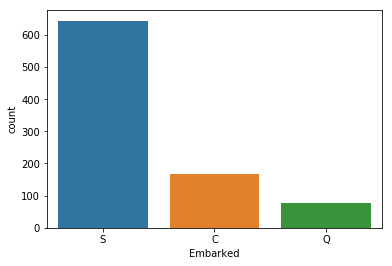

In [100]:
sns.countplot('Embarked',data=train)

In [101]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         332 non-null float64
Ticket      418 non-null object
Fare        417 non-null float64
Embarked    418 non-null object
Title       418 non-null int64
Alone       418 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [102]:
#EMBARKED
#Since 'S' is most occured ,we will fill all the null values with 'S'

train['Embarked']=train['Embarked'].fillna('S')

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
Alone       891 non-null int64
Title       890 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 62.7+ KB


In [104]:
train['Title']=train['Title'].fillna('0')

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
Alone       891 non-null int64
Title       891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [106]:
train.drop('Ticket',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)

In [107]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Title
0,0,3,0,22.0,7.2500,S,1,0
1,1,1,1,38.0,71.2833,C,1,2
2,1,3,1,26.0,7.9250,S,0,1
3,1,1,1,35.0,53.1000,S,1,2
4,0,3,0,35.0,8.0500,S,0,0


In [108]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,3,0,34.5,7.8292,Q,0,0
1,3,1,47.0,7.0000,S,2,1
2,2,0,62.0,9.6875,Q,0,0
3,3,0,27.0,8.6625,S,0,0
4,3,1,22.0,12.2875,S,2,1


In [109]:
#FARE
#Missing fare value in our test data
test['Fare'].fillna(test['Fare'].median(),inplace=True)

In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         332 non-null float64
Fare        418 non-null float64
Embarked    418 non-null object
Title       418 non-null int64
Alone       418 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 22.9+ KB


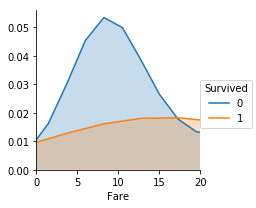

In [111]:
fig=sns.FacetGrid(train,hue='Survived',aspect=1)

fig.map(sns.kdeplot,'Fare',shade=True)
maxi=train['Fare'].max()

fig.set(xlim=(0,20))

fig.add_legend()

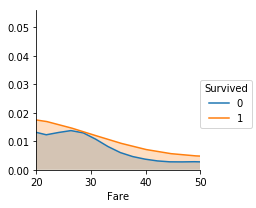

In [112]:
fig=sns.FacetGrid(train,hue='Survived',aspect=1)

fig.map(sns.kdeplot,'Fare',shade=True)
maxi=train['Fare'].max()

fig.set(xlim=(20,50))

fig.add_legend()

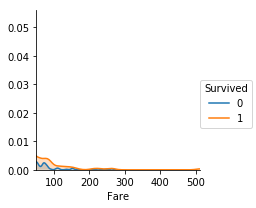

In [113]:
fig=sns.FacetGrid(train,hue='Survived')

fig.map(sns.kdeplot,'Fare',shade=True)
maxi=train['Fare'].max()

fig.set(xlim=(50,maxi))

fig.add_legend()

In [114]:
train.loc[train['Fare']<=17,'Fare']=0
train.loc[(train['Fare'] > 17) & (train['Fare'] <= 30), 'Fare'] = 1,
train.loc[(train['Fare'] > 30) & (train['Fare'] <= 100), 'Fare'] = 2,
train.loc[ train['Fare'] > 100, 'Fare'] = 3





In [115]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Title
0,0,3,0,22.0,0.0,S,1,0
1,1,1,1,38.0,2.0,C,1,2
2,1,3,1,26.0,0.0,S,0,1
3,1,1,1,35.0,2.0,S,1,2
4,0,3,0,35.0,0.0,S,0,0


In [116]:
train['Fare'].value_counts()

0.0    496
2.0    181
1.0    161
3.0     53
Name: Fare, dtype: int64

In [117]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,3,0,34.5,7.8292,Q,0,0
1,3,1,47.0,7.0000,S,2,1
2,2,0,62.0,9.6875,Q,0,0
3,3,0,27.0,8.6625,S,0,0
4,3,1,22.0,12.2875,S,2,1


In [118]:
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [119]:
test['Age'].fillna(test['Age'].mean(),inplace=True)

In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null object
Alone       891 non-null int64
Title       891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
Fare        418 non-null float64
Embarked    418 non-null object
Title       418 non-null int64
Alone       418 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 22.9+ KB


In [122]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,3,0,34.5,7.8292,Q,0,0
1,3,1,47.0,7.0000,S,2,1
2,2,0,62.0,9.6875,Q,0,0
3,3,0,27.0,8.6625,S,0,0
4,3,1,22.0,12.2875,S,2,1


In [123]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Title
0,0,3,0,22.0,0.0,S,1,0
1,1,1,1,38.0,2.0,C,1,2
2,1,3,1,26.0,0.0,S,0,1
3,1,1,1,35.0,2.0,S,1,2
4,0,3,0,35.0,0.0,S,0,0


In [124]:

train.loc[train['Age']<=16,'Age']=0,
train.loc[(train['Age']>16)&(train['Age']<=26),'Age']=1,
train.loc[(train['Age']>26)&(train['Age']<=38),'Age']=2,
train.loc[(train['Age']>38)&(train['Age']<=62),'Age']=3,
train.loc[train['Age']>62,'Age']=4

In [125]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Title
0,0,3,0,1.0,0.0,S,1,0
1,1,1,1,2.0,2.0,C,1,2
2,1,3,1,1.0,0.0,S,0,1
3,1,1,1,2.0,2.0,S,1,2
4,0,3,0,2.0,0.0,S,0,0


In [126]:

	
test.loc[test['Age']<=16,'Age']=0,
test.loc[(test['Age']>16)&(test['Age']<=26),'Age']=1,
test.loc[(test['Age']>26)&(test['Age']<=38),'Age']=2,
test.loc[(test['Age']>38)&(test['Age']<=62),'Age']=3,
test.loc[test['Age']>62,'Age']=4

In [127]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,3,0,2.0,7.8292,Q,0,0
1,3,1,3.0,7.0000,S,2,1
2,2,0,3.0,9.6875,Q,0,0
3,3,0,2.0,8.6625,S,0,0
4,3,1,1.0,12.2875,S,2,1


In [128]:
test.loc[test['Fare']<=17,'Fare']=0
test.loc[(test['Fare'] > 17) & (test['Fare'] <= 30), 'Fare'] = 1,
test.loc[(test['Fare'] > 30) & (test['Fare'] <= 100), 'Fare'] = 2,
test.loc[ test['Fare'] > 100, 'Fare'] = 3


In [129]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,3,0,2.0,0.0,Q,0,0
1,3,1,3.0,0.0,S,2,1
2,2,0,3.0,0.0,Q,0,0
3,3,0,2.0,0.0,S,0,0
4,3,1,1.0,0.0,S,2,1


In [130]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Title
0,0,3,0,1.0,0.0,S,1,0
1,1,1,1,2.0,2.0,C,1,2
2,1,3,1,1.0,0.0,S,0,1
3,1,1,1,2.0,2.0,S,1,2
4,0,3,0,2.0,0.0,S,0,0


# Feature Engineering Done

In [153]:
x['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [145]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [155]:
train.loc[train['Embarked']=='S','Embarked']=0
train.loc[train['Embarked']=='C','Embarked']=1
train.loc[train['Embarked']=='Q','Embarked']=2

C:\Users\Garry\Anaconda3\lib\site-packages\pandas\core\ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [159]:
test.loc[test['Embarked']=='S','Embarked']=0
test.loc[test['Embarked']=='C','Embarked']=1
test.loc[test['Embarked']=='Q','Embarked']=2

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn

In [165]:
x=train.drop('Survived',axis=1)

In [166]:
y=train['Survived']

In [167]:
x.head()

,Pclass,Sex,Age,Fare,Embarked,Alone,Title
0,3,0,1.0,0.0,0,1,0
1,1,1,2.0,2.0,1,1,2
2,3,1,1.0,0.0,0,0,1
3,1,1,2.0,2.0,0,1,2
4,3,0,2.0,0.0,0,0,0


In [168]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null int64
Alone       891 non-null int64
Title       891 non-null object
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


In [183]:
clf=RandomForestClassifier(n_estimators=50)
clf.fit(x,y)

y_pred=clf.predict(test)

clf.score(x,y)


0.8742985409652076

In [179]:
svc=SVC()
svc.fit(x,y)

y_pred_1=svc.predict(test)
svc.score(x,y)

0.8361391694725028

In [181]:
log=LogisticRegression()
log.fit(x,y)
y_pred_2=log.predict(test)
log.score(x,y)

0.8114478114478114

In [184]:
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

# K fold cross validation to improve accuracy

In [192]:
from sklearn.model_selection import cross_val_score



In [200]:
clf=RandomForestClassifier(n_estimators=50)
clf.fit(x,y)

y_pred=clf.predict(test)

accuracies=cross_val_score(clf,x,y,cv=10)
accuracies.mean()

0.8115194075587334

In [202]:
svc=SVC(kernel='rbf')
svc.fit(x,y)

y_pred_1=svc.predict(test)
svc.score(x,y)

accuracies=cross_val_score(svc,x,y,cv=10)
accuracies.mean()

0.8260010214504596

In [203]:
log=LogisticRegression()
log.fit(x,y)
y_pred_2=log.predict(test)
log.score(x,y)

accuracies=cross_val_score(log,x,y,cv=10)
accuracies.mean()

0.8091712064464873

In [204]:
y_final=y_pred_1

In [205]:
hell=pd.read_csv('test.csv')

submission=pd.DataFrame({"PassengerId":hell['PassengerId'],"Survived":y_pred})

In [206]:
submission.to_csv('titanic.csv',index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
